In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
class LinearRegression() :

    def __init__(self, learning_rate, iterations) :
        # Скорость обучения
        self.learning_rate = learning_rate
        # Количество итераций
        self.iterations = iterations
        # Веса
        self.weights = None
        # Смещение
        self.bias = None

    def fit(self, X, Y) :
        n_features = X.shape[1]
        # Инициализация весов и смещения
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Обновление весов и смещения
        for _ in range(self.iterations):
            self.update_weights(X, Y)
        return self

    def update_weights(self, X, Y):
        n_samples = X.shape[0]
        # Предсказание
        Y_pred = np.dot(X, self.weights ) + self.bias
        
        # Вычисление градиента
        dw = (1/n_samples) * np.dot(X.T, (Y_pred - Y))
        db = (1/n_samples) * np.sum(Y_pred - Y)
        
        # Обновление весов и смещения
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
        return self

    def predict( self, X ) :
        return np.dot(X, self.weights) + self.bias

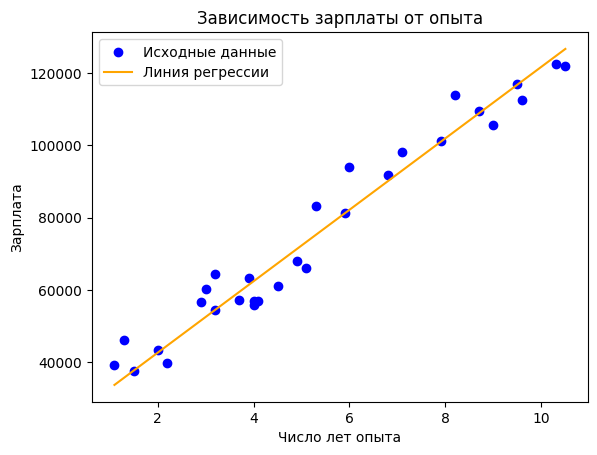

In [8]:
df = pd.read_csv( "salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()